In [ ]:
# Edycja kodu w notatniku Colab (Colaboratory) na dysku Google.

In [ ]:
!git clone https://github.com/akarpinski/Klasteryzacja_obrazow.git

Cloning into 'Klasteryzacja_obrazow'...
remote: Enumerating objects: 2543, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 2543 (delta 6), reused 29 (delta 4), pack-reused 2512
Receiving objects: 100% (2543/2543), 61.66 MiB | 22.88 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (2503/2503), done.


In [ ]:
# dane w repozytorium GitHub "dane_machine_learning_python"

In [ ]:
!ls

Klasteryzacja_obrazow  sample_data


In [ ]:
#!ls train

In [ ]:
!ls /content/Klasteryzacja_obrazow/train

architecture  beach  forest  mountains


In [ ]:
#!ls train/architecture/

In [ ]:
!ls /content/Klasteryzacja_obrazow/train/architecture

16860635687416.jpg  16860637879194.jpg	16860640278888.jpg  16860642286056.jpg
16860635699208.jpg  16860637892077.jpg	16860640279289.jpg  16860642332529.jpg
16860635704592.jpg  16860637916213.jpg	16860640285415.jpg  16860642341939.jpg
16860635724360.jpg  16860637922334.jpg	16860640289696.jpg  16860642364636.jpg
16860635759190.jpg  16860638009359.jpg	16860640294692.jpg  16860642371471.jpg
16860635771688.jpg  16860638012637.jpg	16860640294699.jpg  16860642394467.jpg
16860635789707.jpg  16860638078803.jpg	16860640324145.jpg  16860642396907.jpg
16860635841046.jpg  16860638096702.jpg	16860640329608.jpg  16860642401101.jpg
16860635857231.jpg  16860638126294.jpg	16860640344370.jpg  16860642437853.jpg
16860635861844.jpg  16860638181233.jpg	16860640359698.jpg  16860642457706.jpg
16860635867028.jpg  16860638191242.jpg	16860640361079.jpg  16860642496905.jpg
16860635882980.jpg  16860638193606.jpg	16860640369976.jpg  16860642516117.jpg
16860635985979.jpg  16860638229425.jpg	16860640419613.jpg  16860

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np

In [ ]:
modelcv = InceptionResNetV2(include_top=False, input_shape=(224,224,3), pooling="max")

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
import os

In [ ]:
def load_images_from_folder(folder, nazwy=None, foldery=None, output=None, liczba_obrazow=150):
  if nazwy is None:
    nazwy = []
  if foldery is None:
    foldery = []
  if output is None:
    output = []
  i=0
  for nazwa in os.listdir(folder):
    if i<liczba_obrazow:
      path = os.path.join(folder, nazwa)
      img = image.load_img(path, target_size=(224,224))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      represent = modelcv.predict(x)
      nazwy.append(path)
      foldery.append(folder)
      output.append(list(represent[0]))
      i += 1
  return nazwy, foldery, output

In [ ]:
nazwy, foldery, output = load_images_from_folder("/content/Klasteryzacja_obrazow/test/beach")
nazwy, foldery, output = load_images_from_folder("/content/Klasteryzacja_obrazow/test/architecture/", nazwy, foldery, output)
nazwy, foldery, output = load_images_from_folder("/content/Klasteryzacja_obrazow/test/mountains/", nazwy, foldery, output)
nazwy, foldery, output = load_images_from_folder("/content/Klasteryzacja_obrazow/test/forest", nazwy, foldery, output)

1/1 [==============================] - 0s 307ms/step


In [ ]:
len(output)

450

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(np.array(output))

In [ ]:
df["nazwy"]=nazwy
df["foldery"]=foldery

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,nazwy,foldery
0,2.013761,3.716338,1.355595,0.710031,1.112518,1.048560,3.660408,1.748624,4.953916,2.873804,...,5.548530,3.782393,2.270329,0.674365,0.743355,1.124699,3.021410,0.000000,/content/Klasteryzacja_obrazow/test/beach/1686...,/content/Klasteryzacja_obrazow/test/beach
1,2.208620,2.031438,5.097345,1.696806,3.688873,0.069402,3.364794,2.262739,1.027534,2.160774,...,3.873954,2.075697,0.974720,1.663371,6.613684,6.136324,2.697771,9.847257,/content/Klasteryzacja_obrazow/test/beach/1686...,/content/Klasteryzacja_obrazow/test/beach
2,3.566287,4.855734,0.000000,2.696588,0.159716,1.565579,2.211431,2.722065,2.805492,4.172715,...,5.936317,5.744664,5.119411,0.439090,0.140824,1.578040,0.884646,1.300531,/content/Klasteryzacja_obrazow/test/beach/1686...,/content/Klasteryzacja_obrazow/test/beach
3,1.669313,4.311522,1.027785,2.467764,1.855810,0.642755,2.093067,0.713478,1.284040,1.662864,...,8.380155,0.999911,2.143761,0.500984,0.330165,1.057446,0.844481,0.000000,/content/Klasteryzacja_obrazow/test/beach/1686...,/content/Klasteryzacja_obrazow/test/beach
4,2.388567,4.090405,0.762293,4.085661,0.000000,0.986913,1.759319,1.709320,3.397993,0.847082,...,4.839123,0.805521,1.083765,0.596038,0.556921,1.215415,1.454555,0.676751,/content/Klasteryzacja_obrazow/test/beach/1686...,/content/Klasteryzacja_obrazow/test/beach


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def similar_pictures(indeks=0):
  nazwa = df.iloc[indeks,:]["nazwy"]
  img = cv2.imread(nazwa)
  cv2_imshow(img)

  min_dist = None
  min_dist_index = None

  for i in range(df.shape[0]):
    if i!=indeks:
      dist = np.linalg.norm(np.array(df.iloc[indeks, :-2]) - np.array(df.iloc[i, :-2]), ord=2)
      if min_dist is None:
        min_dist = dist
        min_dist_index = i
      elif min_dist>dist:
        min_dist = dist
        min_dist_index = i

  nazwa = df.iloc[min_dist_index,:]["nazwy"]
  img = cv2.imread(nazwa)
  cv2_imshow(img)

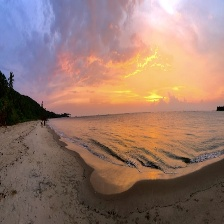

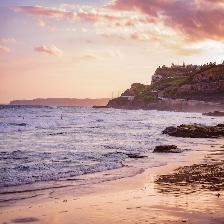

In [ ]:
similar_pictures()

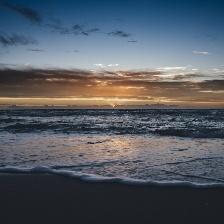

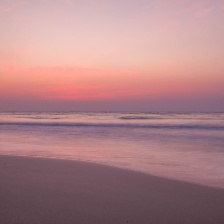

In [ ]:
similar_pictures(100)

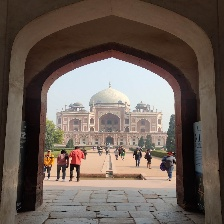

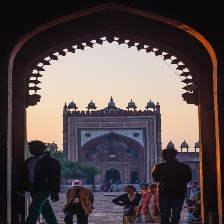

In [ ]:
similar_pictures(200)

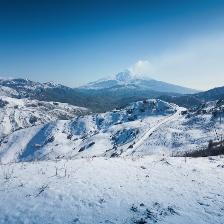

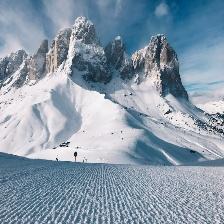

In [ ]:
similar_pictures(300)

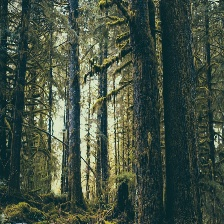

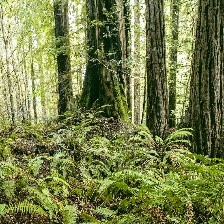

In [ ]:
similar_pictures(400)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#model = KMeans(n_clusters=40)
model = KMeans(n_clusters=40, n_init=10)
model.fit(df.iloc[:,:-2])
df["cluster"] = model.predict(df.iloc[:,:-2])

(array([ 2.,  4., 10., 12., 39., 10.,  3., 23.,  7.,  7., 11., 21., 22.,
         1., 10.,  5.,  1., 16., 10.,  1.,  4., 14., 16.,  1.,  1., 35.,
        17.,  1.,  1.,  2.,  7., 21., 10., 18.,  6.,  1., 45., 16.,  1.,
        18.]),
 array([ 0.   ,  0.975,  1.95 ,  2.925,  3.9  ,  4.875,  5.85 ,  6.825,
         7.8  ,  8.775,  9.75 , 10.725, 11.7  , 12.675, 13.65 , 14.625,
        15.6  , 16.575, 17.55 , 18.525, 19.5  , 20.475, 21.45 , 22.425,
        23.4  , 24.375, 25.35 , 26.325, 27.3  , 28.275, 29.25 , 30.225,
        31.2  , 32.175, 33.15 , 34.125, 35.1  , 36.075, 37.05 , 38.025,
        39.   ]),
 <BarContainer object of 40 artists>)

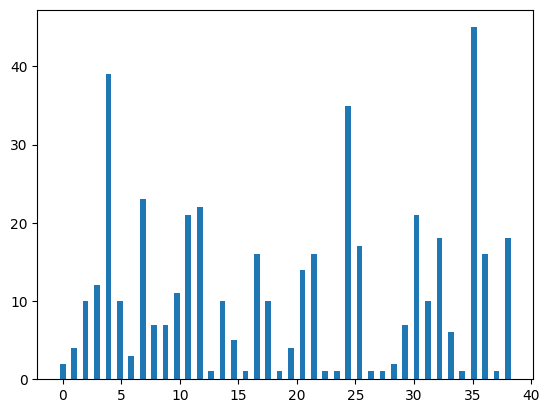

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["cluster"], rwidth=0.5, bins=40, align="left")

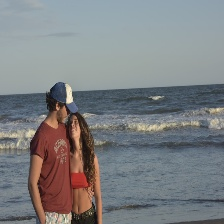

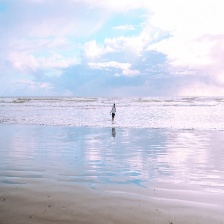

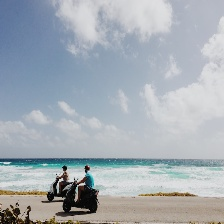

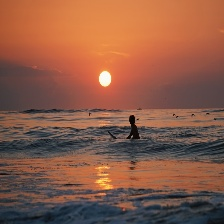

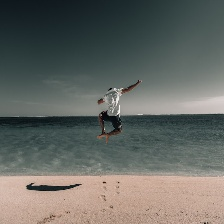

In [ ]:
for nazwa in list(df[df["cluster"]==2]["nazwy"])[:5]:
  img = cv2.imread(nazwa)
  cv2_imshow(img)

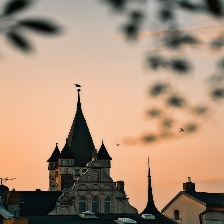

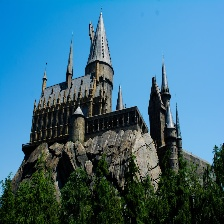

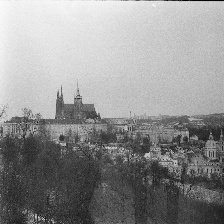

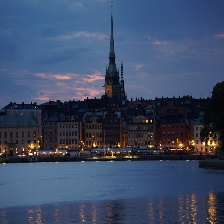

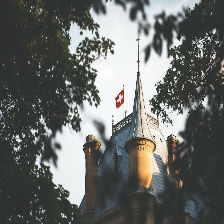

In [ ]:
for nazwa in list(df[df["cluster"]==5]["nazwy"])[:5]:
  img = cv2.imread(nazwa)
  cv2_imshow(img)

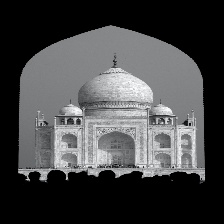

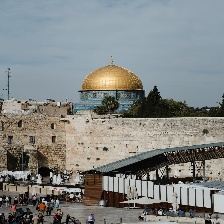

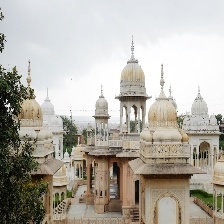

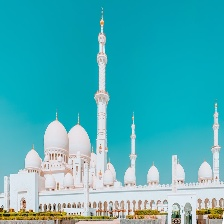

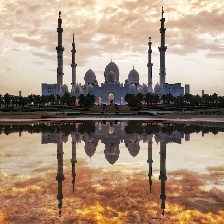

In [ ]:
for nazwa in list(df[df["cluster"]==7]["nazwy"])[:5]:
  img = cv2.imread(nazwa)
  cv2_imshow(img)